In [ ]:
from google.colab import drive
import pandas as pd
import os


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = '/content/drive/MyDrive/mimic_results'
os.listdir('/content/drive/MyDrive/mimic_results')

['query_25_main.csv',
 'merged_df.csv',
 'vap_target_variable.csv',
 'df_cleaned.csv']

In [ ]:
df = pd.read_csv(os.path.join(base_path, 'df_cleaned.csv'))


In [ ]:
df.head()

,subject_id,vap,gender,age,ethnicity,diabetes,hypertension,myocardial_infarction,cerebral_vascular_disease,coronary_heart_disease,asthma,systolic_bp,gcs,hemoglobin,platelet,tracheostomy,mortality_30d,icustay_length,hospital_stay_length
0,65,0,0,0.084416,20,0,0,0,0,0,0,0.112382,0.004191,0.145106,0.055319,0.345564,0,0.050847,0.049505
1,80,0,0,0.142857,20,0,0,0,0,0,0,0.101785,0.004098,0.106247,0.021277,0.444966,0,0.016949,0.024752
2,96,0,0,0.126623,20,0,0,0,0,0,0,0.126880,0.004554,0.486473,0.144681,0.538987,0,0.338983,0.143564
3,129,0,0,0.120130,1,0,0,0,0,0,0,0.113473,0.003252,0.098377,0.097872,0.380270,0,0.016949,0.044554
4,141,0,0,0.259740,2,1,0,0,0,0,0,0.115074,0.002647,0.079193,0.182979,0.616220,1,0.050847,0.014851


Training Random Forest model...

Training Logistic Regression model...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training AdaBoost model...

=== Random Forest Evaluation ===
Accuracy: 0.9758

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       685
           1       0.50      0.24      0.32        17

    accuracy                           0.98       702
   macro avg       0.74      0.61      0.65       702
weighted avg       0.97      0.98      0.97       702


Confusion Matrix:
[[681   4]
 [ 13   4]]
AUC: 0.9799

=== Logistic Regression Evaluation ===
Accuracy: 0.9729

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       685
           1       0.00      0.00      0.00        17

    accuracy                           0.97       702
   macro avg       0.49      0.50      0.49       702
weighted avg       0.95      0.97      0.96       702


Confusion Matrix:
[[683   2]
 [ 17   0]]
AUC: 0.8777

=== AdaBoost Evaluation ===
Accuracy: 0.9786

Classif

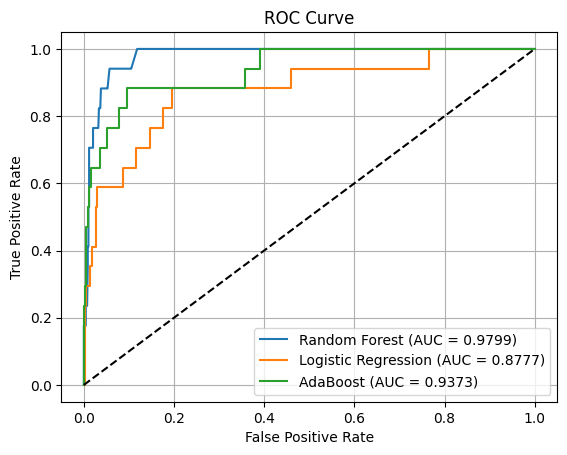

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'df' is your preprocessed dataframe
# Define the features (X) and target variable (y)
X = df.drop(columns=['vap'])  # Drop the target column
y = df['vap']  # Target variable

# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

specificity_sensitiivity_dict = {}

# Initializing models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, max_iter=1000)
ab_model = AdaBoostClassifier(random_state=42)

# Training the Random Forest model
print("Training Random Forest model...")
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Training the Logistic Regression model
print("\nTraining Logistic Regression model...")
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:, 1]

# Training the AdaBoost model
print("\nTraining AdaBoost model...")
ab_model.fit(X_train, y_train)
ab_predictions = ab_model.predict(X_test)
ab_probabilities = ab_model.predict_proba(X_test)[:, 1]

# Getting specificity and sensitivity
def get_specificity_sensitivity(confusion_matrix):
    tn, fp, fn, tp = confusion_matrix.ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    return specificity, sensitivity




# Evaluation function for models
def evaluate_model(model_name, y_test, predictions, probabilities):
    print(f"\n=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_test, predictions):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, predictions))

    specificity, sensitivity = get_specificity_sensitivity(confusion_matrix(y_test, predictions))
    specificity_sensitiivity_dict[model_name] = (specificity, sensitivity)


    auc_score = roc_auc_score(y_test, probabilities)
    print(f"AUC: {auc_score:.4f}")
    return auc_score

# Plotting the ROC curve
def plot_roc_curve(model_name, y_test, probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, probabilities):.4f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")

# Evaluate and plot ROC curves for Random Forest
rf_auc = evaluate_model("Random Forest", y_test, rf_predictions, rf_probabilities)
plot_roc_curve("Random Forest", y_test, rf_probabilities)

# Evaluate and plot ROC curves for Logistic Regression
lr_auc = evaluate_model("Logistic Regression", y_test, lr_predictions, lr_probabilities)
plot_roc_curve("Logistic Regression", y_test, lr_probabilities)

# Evaluate and plot ROC curves for AdaBoost
ab_auc = evaluate_model("AdaBoost", y_test, ab_predictions, ab_probabilities)
plot_roc_curve("AdaBoost", y_test, ab_probabilities)

# Finalize and display the ROC plot
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # Reference line
plt.grid()
plt.show()


In [ ]:
#higher the AUC, better as it covers the most area

In [ ]:
for k, v in specificity_sensitiivity_dict.items():
  print("\nModel : ", k, "\nSpecificity : ", v[0], ", Sensitivity : ", v[1])


Model :  Random Forest 
Specificity :  0.9941605839416059 , Sensitivity :  0.23529411764705882

Model :  Logistic Regression 
Specificity :  0.997080291970803 , Sensitivity :  0.0

Model :  AdaBoost 
Specificity :  0.997080291970803 , Sensitivity :  0.23529411764705882


In [ ]:
for k, v in specificity_sensitiivity_dict.items():
    print("\nModel : ", k, "\nSpecificity : ", round(v[0], 2), ", Sensitivity : ", round(v[1], 2))



Model :  Random Forest 
Specificity :  0.99 , Sensitivity :  0.24

Model :  Logistic Regression 
Specificity :  1.0 , Sensitivity :  0.0

Model :  AdaBoost 
Specificity :  1.0 , Sensitivity :  0.24


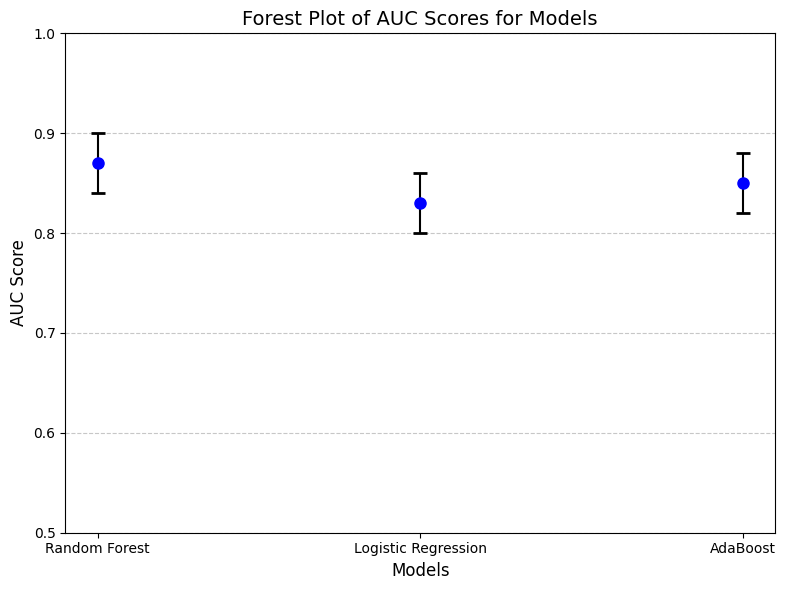

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example AUC scores for models (replace these with actual scores)
models = ['Random Forest', 'Logistic Regression', 'AdaBoost']
auc_scores = [0.87, 0.83, 0.85]  # Replace with your actual AUC scores
confidence_intervals = [(0.84, 0.90), (0.80, 0.86), (0.82, 0.88)]  # Replace with your CI bounds

# Extract lower and upper bounds for confidence intervals
lower_bounds = [auc - ci[0] for auc, ci in zip(auc_scores, confidence_intervals)]
upper_bounds = [ci[1] - auc for auc, ci in zip(auc_scores, confidence_intervals)]

# Convert models to positions on x-axis
x_positions = np.arange(len(models))

# Plotting the forest plot
plt.figure(figsize=(8, 6))
plt.errorbar(
    x_positions,  # Models (x-axis as positions)
    auc_scores,   # AUC scores (y-axis)
    yerr=[lower_bounds, upper_bounds],  # Confidence intervals as error bars
    fmt='o',      # Circular marker for points
    color='blue', ecolor='black', capsize=5, capthick=2, markersize=8
)

# Add model names to x-axis
plt.xticks(ticks=x_positions, labels=models, fontsize=10)

# Adding labels, title, and grid
plt.title('Forest Plot of AUC Scores for Models', fontsize=14)
plt.ylabel('AUC Score', fontsize=12)
plt.xlabel('Models', fontsize=12)
plt.ylim(0.5, 1.0)  # AUC scores typically range between 0.5 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


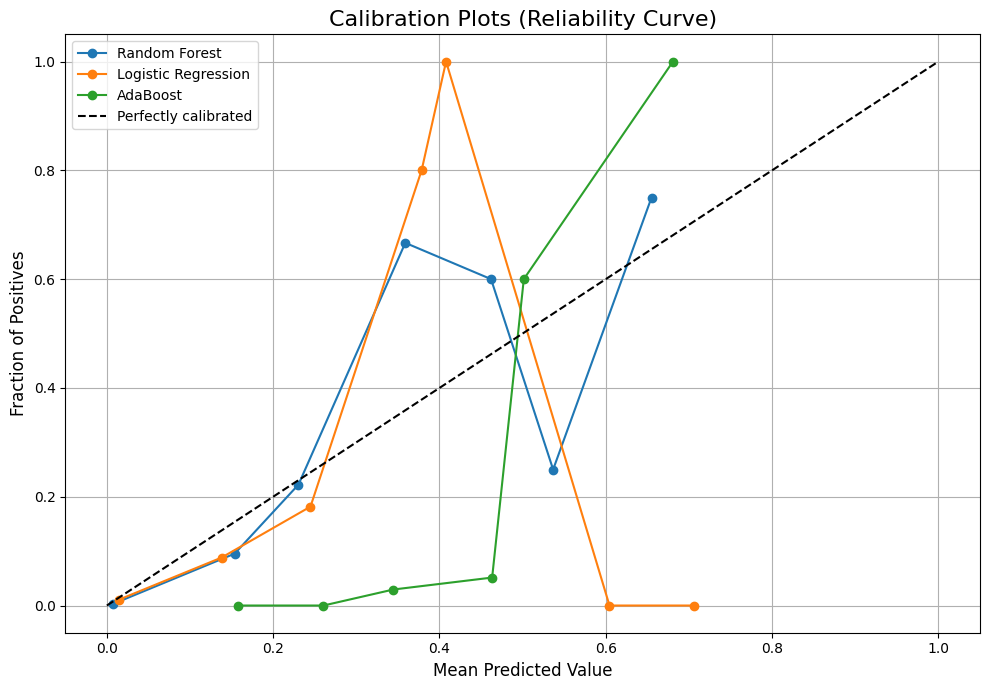

In [ ]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Assuming you have model predictions and true values
# Replace these with actual predictions and labels for each model
y_true = y_test  # True labels (0/1)
predictions = {
    'Random Forest': rf_model.predict_proba(X_test)[:, 1],
    'Logistic Regression': lr_model.predict_proba(X_test)[:, 1],
    'AdaBoost': ab_model.predict_proba(X_test)[:, 1],
}

plt.figure(figsize=(10, 7))

# Loop through each model and plot the calibration curve
for model_name, y_pred in predictions.items():
    fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_pred, n_bins=10, strategy='uniform')
    plt.plot(mean_predicted_value, fraction_of_positives, marker='o', label=model_name)

# Add a perfectly calibrated reference line
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")

# Add labels, title, and legend
plt.title("Calibration Plots (Reliability Curve)", fontsize=16)
plt.xlabel("Mean Predicted Value", fontsize=12)
plt.ylabel("Fraction of Positives", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()


<ipython-input-12-6067ebccf151>:24: RuntimeWarning: divide by zero encountered in scalar divide
  net_benefit = prop_positives - prop_false_positives * (threshold / (1 - threshold))
<ipython-input-12-6067ebccf151>:24: RuntimeWarning: invalid value encountered in scalar multiply
  net_benefit = prop_positives - prop_false_positives * (threshold / (1 - threshold))
<ipython-input-12-6067ebccf151>:49: RuntimeWarning: divide by zero encountered in divide
  treat_all = np.mean(y_true) - (1 - np.mean(y_true)) * thresholds / (1 - thresholds)


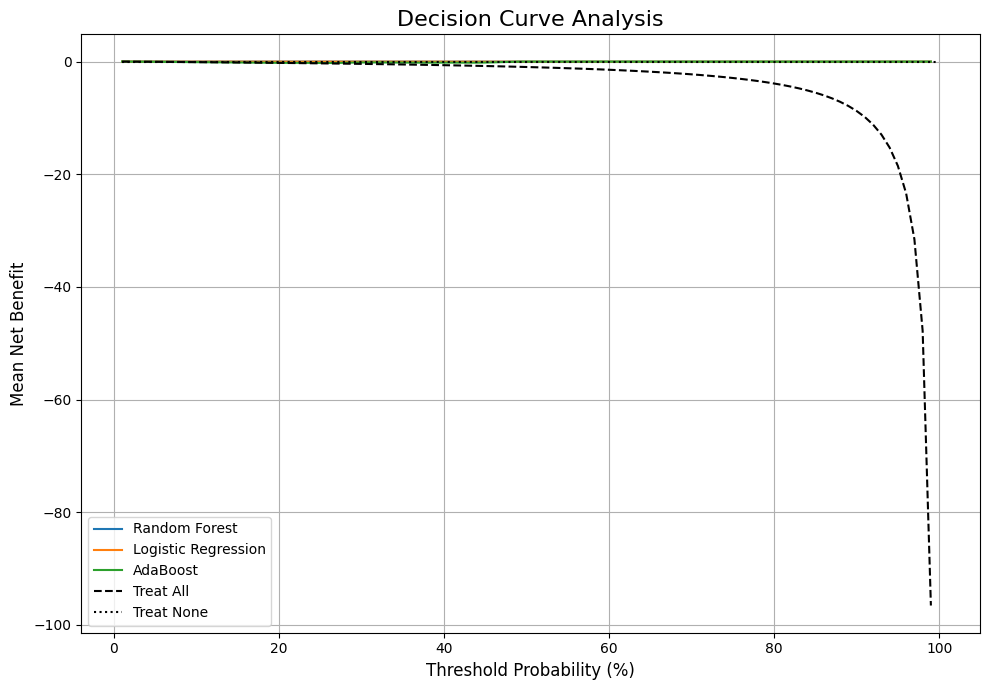

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_net_benefit(y_true, y_prob, thresholds):
    """
    Calculate net benefit for a range of threshold probabilities.
    """
    n = len(y_true)
    net_benefits = []

    for threshold in thresholds:
        # Predicted positives based on the threshold
        predicted_positive = y_prob >= threshold

        # Calculate true positives and false positives
        true_positives = np.sum((predicted_positive == 1) & (y_true == 1))
        false_positives = np.sum((predicted_positive == 1) & (y_true == 0))

        # Proportion of positives and negatives
        prop_positives = true_positives / n
        prop_false_positives = false_positives / n

        # Net benefit formula
        net_benefit = prop_positives - prop_false_positives * (threshold / (1 - threshold))
        net_benefits.append(net_benefit)

    return net_benefits

# True labels (binary target variable)
y_true = y_test

# Predicted probabilities for each model
predictions = {
    'Random Forest': rf_model.predict_proba(X_test)[:, 1],
    'Logistic Regression': lr_model.predict_proba(X_test)[:, 1],
    'AdaBoost': ab_model.predict_proba(X_test)[:, 1],
}

# Threshold probabilities (e.g., from 1% to 100%)
thresholds = np.linspace(0.01, 1.0, 100)

# Plot decision curves
plt.figure(figsize=(10, 7))
for model_name, y_prob in predictions.items():
    net_benefit = calculate_net_benefit(y_true, y_prob, thresholds)
    plt.plot(thresholds * 100, net_benefit, label=model_name)

# Add a "treat all" and "treat none" line for reference
treat_all = np.mean(y_true) - (1 - np.mean(y_true)) * thresholds / (1 - thresholds)
treat_none = np.zeros_like(thresholds)
plt.plot(thresholds * 100, treat_all, 'k--', label='Treat All')
plt.plot(thresholds * 100, treat_none, 'k:', label='Treat None')

# Add plot labels, title, and legend
plt.title("Decision Curve Analysis", fontsize=16)
plt.xlabel("Threshold Probability (%)", fontsize=12)
plt.ylabel("Mean Net Benefit", fontsize=12)
plt.legend(loc="best", fontsize=10)
plt.grid()

# Display the plot
plt.tight_layout()
plt.show()
